This is the main code for the paper titled **"Improving Out-of-Distribution Data Handling and Corruption Resistance via Modern Hopfield Networks"**.

In [3]:
# Importing necessary libraries
import torch
import numpy as np
import time
import pickle
import matplotlib.pyplot as plt
from torchvision import transforms
from torch import nn

# Store the appropriate device
use_cuda = torch.cuda.is_available()
use_mps = torch.backends.mps.is_available()

if use_cuda:
    device = torch.device("cuda")
elif use_mps:
    device = torch.device("mps")
else:
    device = torch.device("cpu")

# Training the HopfieldPooling

In this section, we train the HopfieldPooling layer on the denoising task. To do so, we utilize the official implementation of the HopfieldPooling layer (https://github.com/ml-jku/hopfield-layers). As a result, it is necessary to clone this repository.

In [4]:
!git clone https://github.com/ml-jku/hopfield-layers.git
!pip3 install git+https://github.com/ml-jku/hopfield-layers

Cloning into 'hopfield-layers'...
remote: Enumerating objects: 646, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 646 (delta 51), reused 51 (delta 51), pack-reused 569 (from 1)
Receiving objects: 100% (646/646), 22.42 MiB | 19.99 MiB/s, done.
Resolving deltas: 100% (349/349), done.
  Cloning https://github.com/ml-jku/hopfield-layers to /tmp/pip-req-build-exd92jxe
  Running command git clone --filter=blob:none --quiet https://github.com/ml-jku/hopfield-layers /tmp/pip-req-build-exd92jxe
  Resolved https://github.com/ml-jku/hopfield-layers to commit f56f929c95b77a070ae675ea4f56b6d54d36e730
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 k

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
!python train_denoising_task.py --save-model

Epoch: 1 	Training Loss: 0.024649
Epoch: 2 	Training Loss: 0.016777
Epoch: 3 	Training Loss: 0.016548
Epoch: 4 	Training Loss: 0.016415
Epoch: 5 	Training Loss: 0.016333
Epoch: 6 	Training Loss: 0.016305
Epoch: 7 	Training Loss: 0.016244
Epoch: 8 	Training Loss: 0.016173
Epoch: 9 	Training Loss: 0.016164
Epoch: 10 	Training Loss: 0.016140
Epoch: 11 	Training Loss: 0.016081
Epoch: 12 	Training Loss: 0.016095
Epoch: 13 	Training Loss: 0.016063
Epoch: 14 	Training Loss: 0.016044
Epoch: 15 	Training Loss: 0.016032
Epoch: 16 	Training Loss: 0.016025
Epoch: 17 	Training Loss: 0.015985
Epoch: 18 	Training Loss: 0.015996
Epoch: 19 	Training Loss: 0.015953
Epoch: 20 	Training Loss: 0.015984


In [11]:
# Loading the trained model
from train_denoising_task import HopfieldModule
hopfieldPooling = HopfieldModule()
hopfieldPooling = hopfieldPooling.to(device)
hopfieldPooling.load_state_dict(torch.load('models/hop.pt', map_location= device))

<All keys matched successfully>

In [12]:
# Loading the training history
with open('logs/hopfield_denoise.pkl', 'rb') as f:
    hopfield_denoise_history = pickle.load(f)

hopfield_denoise_history["loss"]

[0.024648933210410177,
 0.016777204351499677,
 0.01654828013572842,
 0.016414653139188887,
 0.016333436164073647,
 0.016305189256556333,
 0.01624391647987068,
 0.016172859093174338,
 0.016163572852810223,
 0.016140330678472915,
 0.016080743677914143,
 0.01609459934135278,
 0.01606266911700368,
 0.016044256382311384,
 0.016032485312161348,
 0.016025081461605927,
 0.01598469043771426,
 0.015995827751234173,
 0.015952936244818073,
 0.015983599574926]

# Training the base model

To ensure repeatability, we train and use the default convolutional neural network provided by the official PyTorch repository:

https://github.com/pytorch/examples/blob/main/mnist/main.py


In [15]:
# Training the baseline model
!python conv_mnist.py --save-model

100% 9.91M/9.91M [00:01<00:00, 6.07MB/s]
100% 28.9k/28.9k [00:00<00:00, 160kB/s]
100% 1.65M/1.65M [00:01<00:00, 1.52MB/s]
100% 4.54k/4.54k [00:00<00:00, 16.9MB/s]
Train Epoch: 1 [0/60000 (0.00%)]	Loss: 2.282550
Train Epoch: 1 [640/60000 (1.07%)]	Loss: 1.384914
Train Epoch: 1 [1280/60000 (2.13%)]	Loss: 0.967074
Train Epoch: 1 [1920/60000 (3.20%)]	Loss: 0.588458
Train Epoch: 1 [2560/60000 (4.26%)]	Loss: 0.345539
Train Epoch: 1 [3200/60000 (5.33%)]	Loss: 0.484442
Train Epoch: 1 [3840/60000 (6.40%)]	Loss: 0.270103
Train Epoch: 1 [4480/60000 (7.46%)]	Loss: 0.669635
Train Epoch: 1 [5120/60000 (8.53%)]	Loss: 0.241586
Train Epoch: 1 [5760/60000 (9.59%)]	Loss: 0.318341
Train Epoch: 1 [6400/60000 (10.66%)]	Loss: 0.264351
Train Epoch: 1 [7040/60000 (11.73%)]	Loss: 0.207598
Train Epoch: 1 [7680/60000 (12.79%)]	Loss: 0.299642
Train Epoch: 1 [8320/60000 (13.86%)]	Loss: 0.159671
Train Epoch: 1 [8960/60000 (14.93%)]	Loss: 0.292559
Train Epoch: 1 [9600/60000 (15.99%)]	Loss: 0.195912
Train Epoch: 1 [102

In [16]:
# Loading the trained model
from conv_mnist import Net
baseline = Net()
baseline = baseline.to(device)
baseline.load_state_dict(torch.load('models/mnist_cnn.pt', map_location= device))

<All keys matched successfully>

# Loading MNIST-C Test Data

In this section, we load and visualize the MNIST-C dataset. For this purpose, we used the implementation of `TORCH UNCERTAINTY` with some minor changes to fix some bugs.

You can find their official repository here:

https://github.com/ENSTA-U2IS-AI/torch-uncertainty/blob/main/torch_uncertainty/datasets/classification/mnist_c.py

In [18]:
import mnist_c

# Loading data for all corruptions
test_data_all = mnist_c.MNISTC(root=".", download=True, split = "test", transform=transforms.ToTensor(), subset = "all")

# Create the test loader for all corruptions
test_loader_all = torch.utils.data.DataLoader(test_data_all, batch_size=20, num_workers=1, shuffle = True)

100%|██████████| 247M/247M [00:26<00:00, 9.32MB/s]


Shape of a batch images: torch.Size([20, 1, 28, 28])
Shape of a batch labels: torch.Size([20])


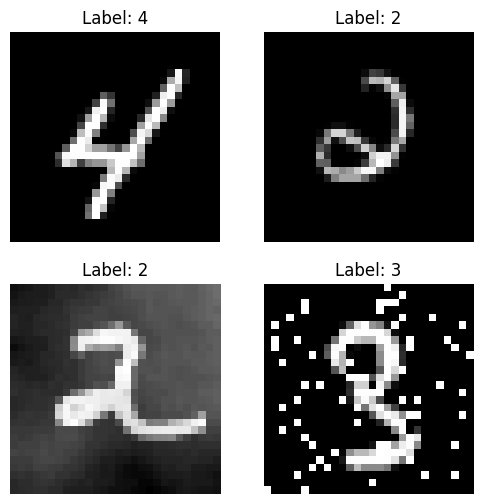

In [19]:
def visualize_data(data_loader) -> None:
    """
    Helper method to visualize a sample of data.
    :param data_loader: The data loader to pull the samples from.
    :return: Nothing.
    """
    # Create a plot for four random samples with their labels.
    fig, ax = plt.subplots(2, 2, figsize=(6, 6))
    # Get a random batch from the data loader.
    images, labels = next(iter(data_loader))
    # Display each image and label.
    for i in range(4):
        img = images[i].squeeze()
        ax[i // 2, i % 2].imshow(img, cmap="gray")
        ax[i // 2, i % 2].axis("off")
        ax[i // 2, i % 2].set_title(f"Label: {labels[i].item()}")
    # Check out the shape of one batch.
    print(f"Shape of a batch images: {images.shape}")
    print(f"Shape of a batch labels: {labels.shape}")

visualize_data(test_loader_all)

# The Integration Algorithm

In this section, we implement our proposed integration algorithm using the pre-trained `hopfieldPooling` module and `baseline` model.



In [20]:
mnistc_subsets = [
    "identity",
    "brightness",
    "canny_edges",
    "dotted_line",
    "fog",
    "glass_blur",
    "impulse_noise",
    "motion_blur",
    "rotate",
    "scale",
    "shear",
    "shot_noise",
    "spatter",
    "stripe",
    "translate",
    "zigzag",
]

def test_hop(
    basemodel: nn.Module, hop: None | nn.Module, cdae: None | nn.Module, corruption: str
) -> None:
    test_data = mnist_c.MNISTC(root=".", split = "test", transform=transforms.ToTensor(), subset = corruption)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=20, num_workers=1, shuffle = True)
    number_use = 0
    basemodel.eval()
    test_loss = 0
    correct = 0
    number_hop_use = 0
    added_time = 0
    condition = hop is not None or cdae is not None
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            if condition:

                output1 = basemodel(data)

                if hop is not None:
                    output2 = basemodel(hop(data))
                else:
                    output2 = basemodel(cdae(data))

                prob1, pred1 = output1.max(
                    dim=1, keepdim=True
                )  # get the index of the max log-probability
                prob2, pred2 = output2.max(dim=1, keepdim=True)
                mult = prob1 > prob2
                pred = (mult * pred1) + ((~mult) * pred2)
                number_use += (~mult).sum().item()

            else:
                output = basemodel(data)
                pred = output.argmax(
                    dim=1, keepdim=True
                )  # get the index of the max log-probability

            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print(
        "\nCorruption: {}, {}{} -> Accuracy: {}/{} ({:.2f}%)\n".format(
            corruption,
            (
                (", Hopfield-integrated" if hop is not None else "CDAE-integrated")
                if condition
                else "not-integrated"
            ),
            ", Percentage of Use: ({}/{}:{:0.2f})".format(number_use,
                                                        len(test_loader.dataset),
                                                        number_use / len(test_loader.dataset) * 100)
            if condition
            else "",
            correct,
            len(test_loader.dataset),
            100.0 * correct / len(test_loader.dataset),
        )
    )

    if condition:
        return correct / len(test_loader.dataset), number_use / len(test_loader.dataset)
    else:
        return correct / len(test_loader.dataset)

In [ ]:
acc, acc_hop, hop_usage = {}, {}, {}

for sub in mnistc_subsets:
  acc[sub] = test_hop(baseline, hop = None, cdae= None, corruption=sub)
  acc_hop[sub], hop_usage[sub] = test_hop(baseline, hop = hopfieldPooling, cdae= None, corruption=sub)

In [ ]:
# Save logs
with open(f'logs/acc.pkl', 'wb') as f:
  pickle.dump(acc, f)

with open(f'logs/acc_hop.pkl', 'wb') as f:
  pickle.dump(acc_hop, f)

with open(f'logs/hop_usage.pkl', 'wb') as f:
  pickle.dump(hop_usage, f)

In [ ]:
# Calculate corruption robustness metrics
def calculate_robustness_metrics(acc, acc_integrated):
  baseline = {"corruption_accuracy": np.mean(np.array([v*100 for k, v in acc.items() if k != "identity"])),
              "relative mCE": 100,
              "mCE": 100}
  integrated = {"corruption_accuracy": np.mean(np.array([v*100 for k, v in acc_integrated.items() if k != "identity"])),
              "relative mCE": None,
              "mCE": None}


  def mCE(relative = False):
    numerator = 0
    denominator = 0
    for c in acc.keys():
      if c != "identity":
        denominator += (1-acc[c]) - ((1-acc["identity"]) if relative else 0)

    for c in acc_integrated.keys():
      if c != "identity":
        numerator += (1-acc_integrated[c]) - ((1-acc_integrated["identity"]) if relative else 0)

    return numerator/denominator*100

  integrated["relative mCE"] = mCE(relative = True)
  integrated["mCE"] = mCE(relative = False)

  return baseline, integrated

In [ ]:
baseline_metrics, hopfield_integration_metrics = calculate_robustness_metrics(acc, acc_hop)

In [ ]:
baseline_metrics

{'corruption_accuracy': 75.92066666666666, 'relative mCE': 100, 'mCE': 100}

In [ ]:
hopfield_integration_metrics

{'corruption_accuracy': 89.764,
 'relative mCE': 39.38694887395833,
 'mCE': 42.509482543813505}

# Ablation Study

In this part, we replace the HopfieldPooling layer with a stacked Convolutional Denoising Autoencoder (CDAE) and compare the results.

### Denoising Task

In [ ]:
!python train_denoising_task.py --cdae --save-model

/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
Epoch: 1 	Training Loss: 0.046485


In [ ]:
# Loading the trained model
from train_denoising_task import CDAE
cdae = CDAE()
cdae = cdae.to(device)
cdae.load_state_dict(torch.load('models/CDAE.pt', map_location= device))

<All keys matched successfully>

In [ ]:
# Loading the training history
with open('logs/CDAE_denoise.pkl', 'rb') as f:
    cdae_denoise_history = pickle.load(f)

cdae_denoise_history["loss"]

[0.04548162427296241,
 0.029718089874833823,
 0.027438430312400064,
 0.02630238570335011,
 0.025568584627161422,
 0.025018312285343805,
 0.024640782558669645,
 0.024324800654004018,
 0.024057044954970477,
 0.023874833231170973,
 0.023649844290688633,
 0.023479002189512054,
 0.023326398283864062,
 0.023148157407219212,
 0.023019469998776913,
 0.022892247435015937,
 0.022761584850028157,
 0.022668517742926875,
 0.022539203917607664,
 0.022466618336737156]

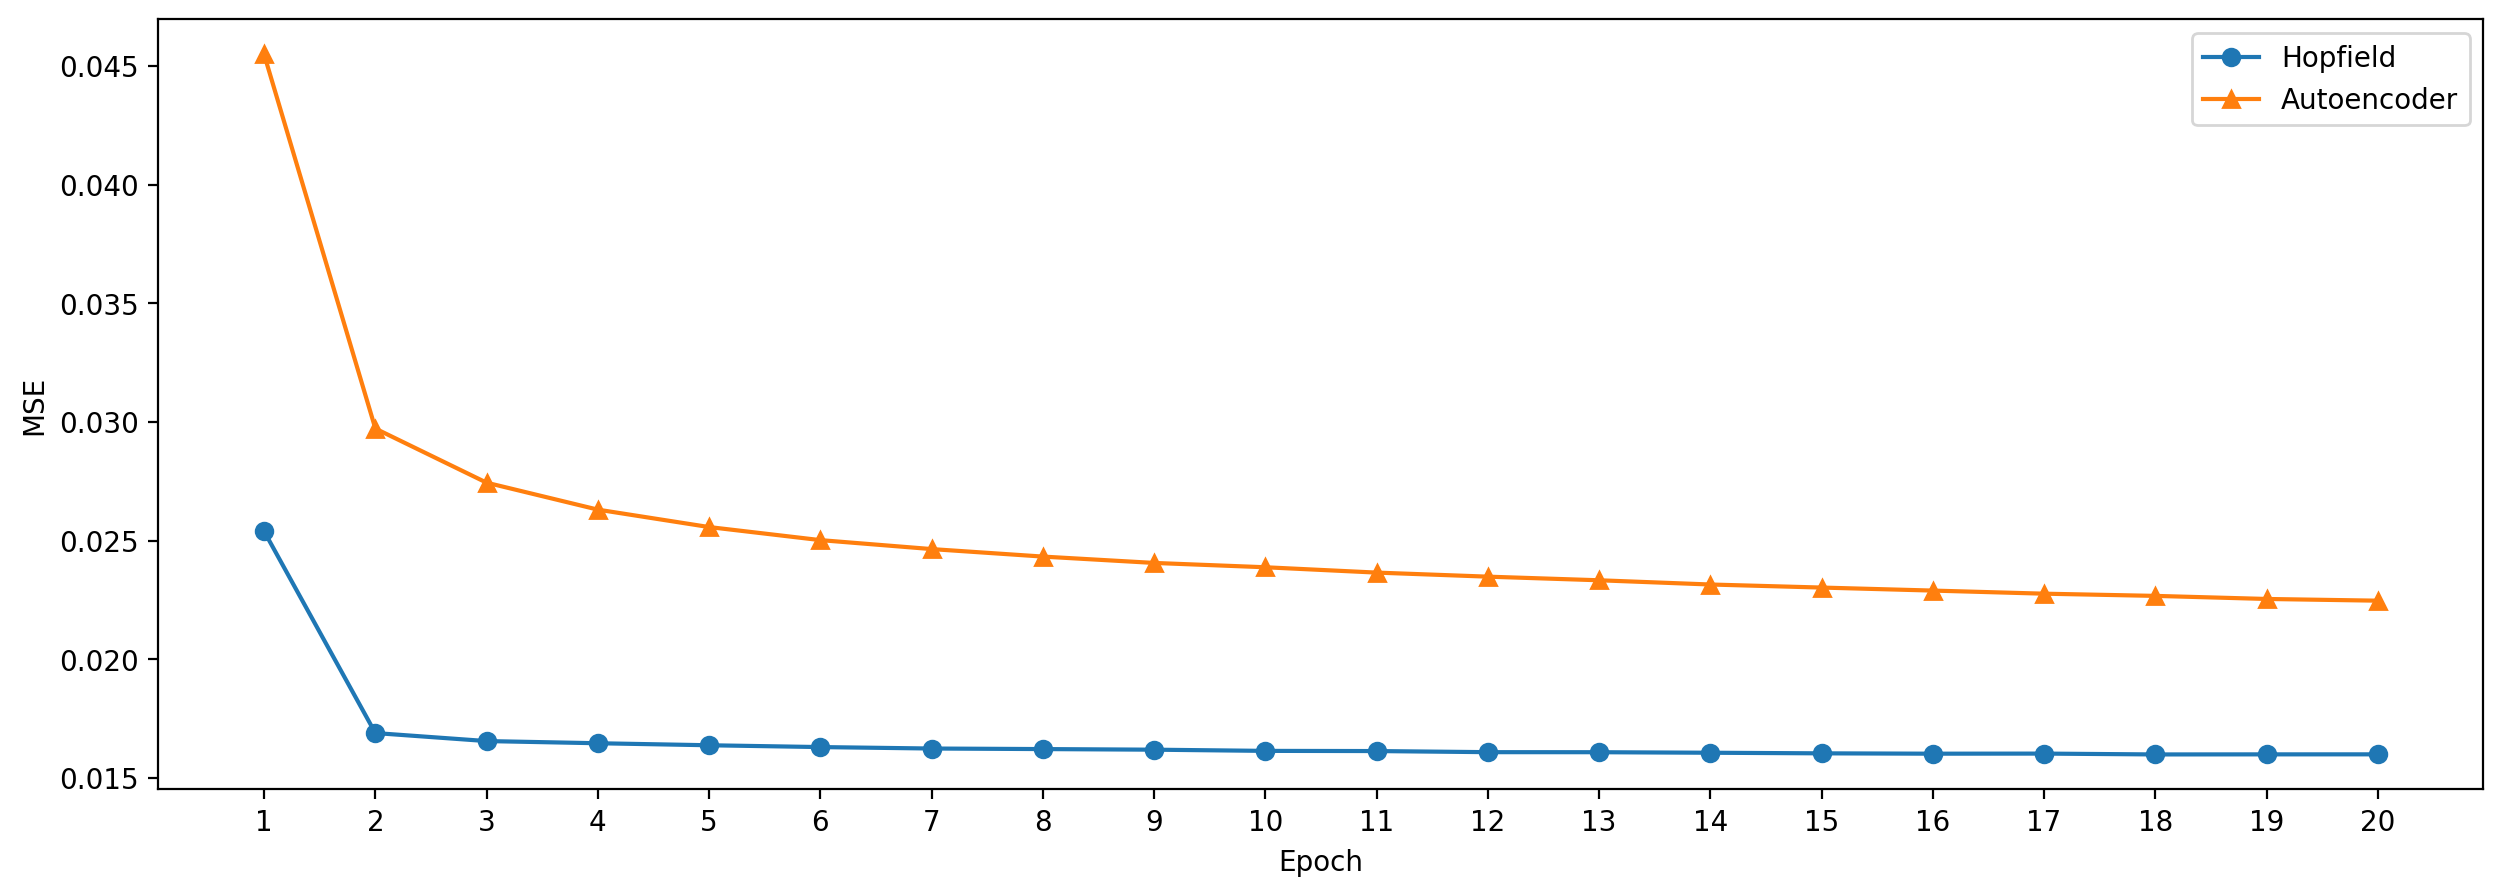

In [ ]:
# Compare HopfieldPooling layer and CDAE in terms of MSE for the denoising task
plt.figure(figsize=(15, 5), dpi = 200)
plt.plot(hopfield_denoise_history["loss"], marker = "o", label = "Hopfield")
plt.plot(cdae_denoise_history["loss"], marker = "^", label = "Autoencoder")
plt.xticks(range(20), labels=[f"{i}" for i in range(1, 21)])
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.show()

### Integration Algorithm

In [ ]:
acc_AE, AE_usage = {}, {}

for sub in mnistc_subsets:
  acc_AE[sub], AE_usage[sub] = test_hop(baseline, hop = None, cdae= cdae, corruption=sub)


Corruption: identity, CDAE-integrated, Percentage of Use: (14/10000:0.14) -> Accuracy: 9899/10000 (98.99%)


Corruption: brightness, CDAE-integrated, Percentage of Use: (201/10000:2.01) -> Accuracy: 8210/10000 (82.10%)


Corruption: canny_edges, CDAE-integrated, Percentage of Use: (0/10000:0.00) -> Accuracy: 7722/10000 (77.22%)


Corruption: dotted_line, CDAE-integrated, Percentage of Use: (351/10000:3.51) -> Accuracy: 9816/10000 (98.16%)


Corruption: fog, CDAE-integrated, Percentage of Use: (2991/10000:29.91) -> Accuracy: 1437/10000 (14.37%)


Corruption: glass_blur, CDAE-integrated, Percentage of Use: (6609/10000:66.09) -> Accuracy: 4260/10000 (42.60%)


Corruption: impulse_noise, CDAE-integrated, Percentage of Use: (3845/10000:38.45) -> Accuracy: 8747/10000 (87.47%)


Corruption: motion_blur, CDAE-integrated, Percentage of Use: (6055/10000:60.55) -> Accuracy: 4636/10000 (46.36%)


Corruption: rotate, CDAE-integrated, Percentage of Use: (344/10000:3.44) -> Accuracy: 8953/10000 (89.

In [ ]:
with open(f'acc_AE.pkl', 'wb') as f:
  pickle.dump(acc_AE, f)

with open(f'AE_usage.pkl', 'wb') as f:
  pickle.dump(AE_usage, f)

In [ ]:
baseline_metrics, cdae_integration_metrics = calculate_robustness_metrics(acc, acc_AE)

In [ ]:
baseline_metrics

{'corruption_accuracy': 75.92066666666666, 'relative mCE': 100, 'mCE': 100}

In [ ]:
cdae_integration_metrics

{'corruption_accuracy': 76.52733333333332,
 'relative mCE': 97.15966435018318,
 'mCE': 97.48055040283508}

### Visualize Output of Modules

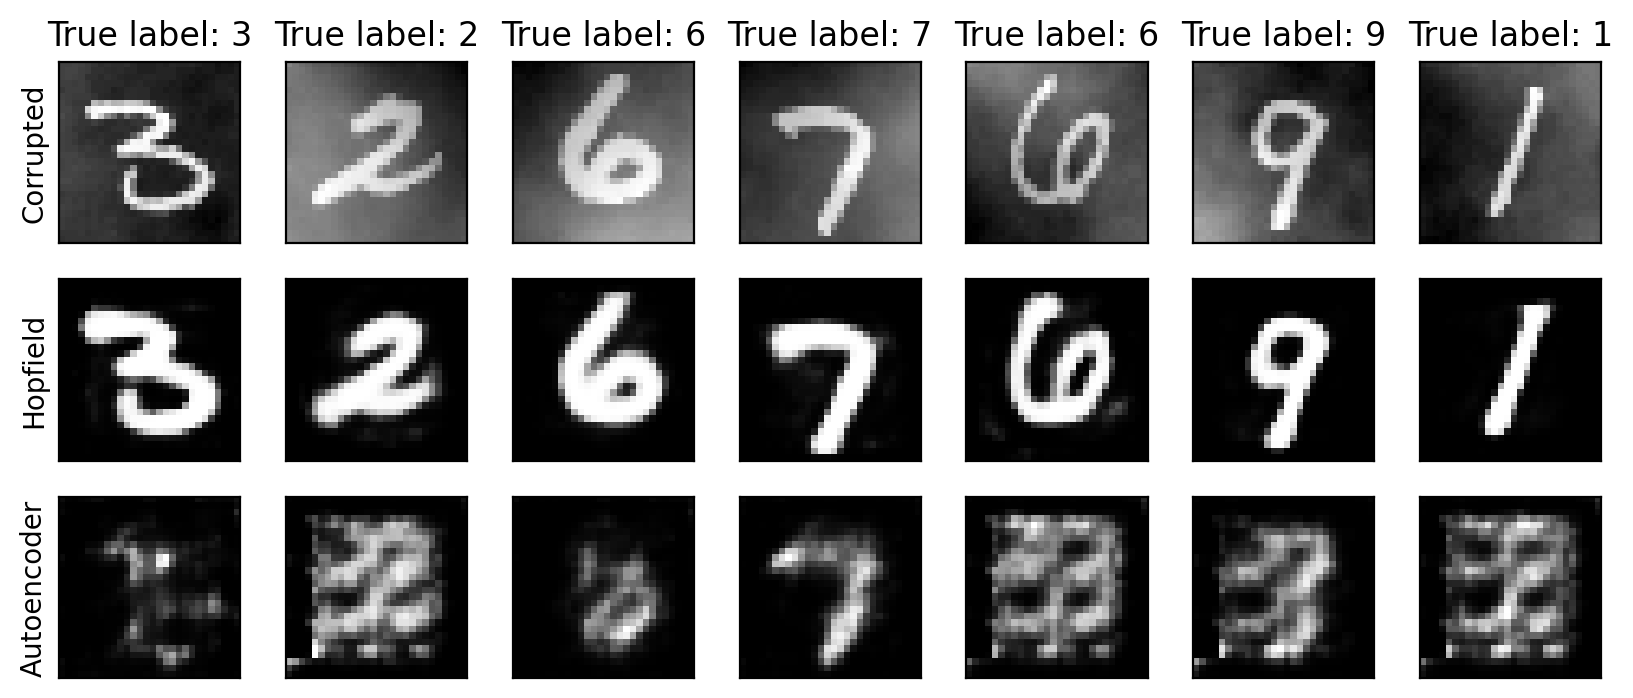

In [ ]:
batch_size = 20
corruption = "fog"

test_data = mnist_c.MNISTC(root=".", split = "test", transform=transforms.ToTensor(), subset = corruption)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=1, shuffle = True)

# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

images, labels = images.to(device), labels.to(device)

# get sample outputs
output1 = hopfieldPooling(images)
output2 = cdae(images)

# output is resized into a batch of images
output1 = output1.view(batch_size, 1, 28, 28)
output2 = output2.view(batch_size, 1, 28, 28)
# use detach when it's an output that requires_grad
output1 = output1.cpu().detach().numpy()
output2 = output2.cpu().detach().numpy()

# plot the first seven input images and then reconstructed images
fig, axes = plt.subplots(nrows=3, ncols=7, sharex=True, sharey=True, figsize=(10,4), dpi = 200)

r, c = 0, 0
y_labels = ["Corrupted", "Hopfield", "Autoencoder"]
# input images on top row, reconstructions on bottom
for img, row in zip([images.cpu(), output1, output2], axes):
    c = 0
    for i, (img, ax) in enumerate(zip(img, row)):
        if not r:
           ax.set_title(f"True label: {labels[i].item()}")
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.set_yticks([])
        if not c:
          ax.set_ylabel(y_labels[r])
        c+=1
    r+=1